# Final Project Submission

Please fill out:
* Student name:  James M. Irving
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: 


<img src="Boston_skyline_from_Longfellow_Bridge_September_2017_panorama_2.jpg" width="800">

# Project Goal:
You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

### The Deliverables
There will be three deliverables for this project:

* A well documented Jupyter Notebook containing any code you've written for this project and comments explaining it.
* A short Keynote/PowerPoint/Google Slides presentation (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders.
* A blog post (800-1500 words) about one element of the project - it could be the EDA, the feature selection, the choice of visualizations or anything else technical relating to the project. It should be targeted at your peers - aspiring data scientists.


#### Model Quality/Approach
Your model should not include any predictors with p-values greater than .05.  
* Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.  
    * **Level Up**: Whenever necessary, you briefly explain the changes made from one iteration to the next, and why you made these choices.  
* You provide at least 1 paragraph explaining your final model.   
* You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset. 

___

# Import Libraries, and load dataframe, display dataframe info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')   

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Drop columns that are not of itnerest  [ID column  ]
df = df.drop('id',axis=1)

# Functions to be used:

In [4]:
# Write a function to print out series information to test for categorical 
def check_column(series):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series),3)}%")
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    print(series.value_counts())
    

# Get an idea of overall missing values and data types

In [5]:
# Display DataFrame Infro
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [6]:
# Check for columns with null values (remember strings/objects are not counted here)
res = df.isna().sum()
print(res[res>0])
# Waterfront, view, yr_renovated have missing values

waterfront      2376
view              63
yr_renovated    3842
dtype: int64


# Recasting variables (while checking for null)
    # THOUGHTS AFTER DF.INFO
    # date: object -> datetime
    # bedrooms: int -> category
    # bathrooms: float -> category?
    # sqft_living: try both leaving as int as well as making category
    # sqft_lot: try both leaving as int as well as making category
    # floors: float -> category
    # waterfront: float -> category
    # view: float -> category
    # condition: int -> category
    # grade: int -> category
    # sqft_above: try both leaving as int as well as making category
    # sqft_basement: object -> try both leaving as int as well as making category
    # yr_built: int -> binned category?
    # yr_renovated: float -> (int?->)category
    # zipcode = drop or category
    # lat 
    # long
    # sqft_living15: try both leaving as int as well as making category
    # sqfit_lofe15: try both leaving as int as well as making category


In [7]:
# df.info()

## Recasting variables - Required for analysis 

In [8]:
# Recast categories as strings for visualization purposes
df['zipcode'] = df['zipcode'].astype('str')
df['lat'] = df['lat'].astype('str')
df['long'] = df['long'].astype('str')
df['view'] = df['view'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')
df['condition'] = df['condition'].astype('str')
df['grade'] = df['grade'].astype('str')

### Floors

In [9]:
df['floors'] = df['floors'].astype('category')

### Recast df['date'] as datetime

In [10]:
## Recast df['date'] as datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].nunique()

372

### sqft_basement

In [11]:
#JUST RECASt SQFT_BASEMENT AS FLOAT

df['sqft_basement'].replace('?','0.0',inplace=True)
df['sqft_basement']=df['sqft_basement'].astype('float')



```python
## Bin and categorize sqft_basement
# check_column(df['sqft_basement']) 
print(f"Min: {df['sqft_basement'].min()}, max:{df['sqft_basement'].max()}")

# make sqft_bins
bins = list(range(1,5500,500))
bins_basement = pd.cut(df['sqft_basement'], bins) # Cut into bins
bins_basement = bins_basement.cat.as_unordered()

df['binned_basement']=bins_basement

df['binned_basement'].replace(np.NaN,"NaN",inplace=True)

df['binned_basement'].value_counts()
check_column(df['binned_basement'])

# Drop original columns
df.drop('sqft_basement',axis=1,inplace=True)
```

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null category
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null object
lat              21597 non-null object
long             21597 non-null object
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), datetime64[ns](1), float64(4), int64(7), object(7)
memory usage: 3.2+ MB


In [13]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Visualizing recasted data

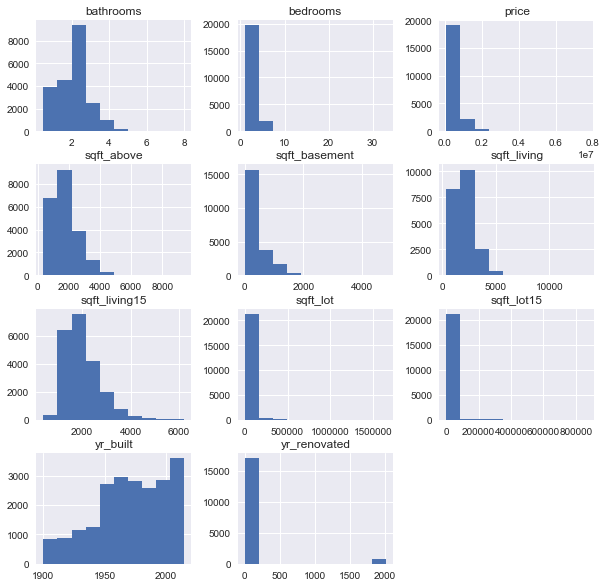

In [14]:
fig = df.hist(figsize=(10,10))
# fig = pd.plotting.scatter_matrix(df, figsize=[16,16],marker='.')

# Transform Data

In [15]:
import numpy as np
df_log = pd.DataFrame([])
df['log_price'] = np.log(df['price'])
df['log_sqftliving'] = np.log(df['sqft_living'])
df['log_sqftlot'] = np.log(df['sqft_lot'])

# df['log_bedrooms'] = np.log(df['bedrooms'])




In [16]:
# too_big =df[df['bedrooms']<12]
too_big =df['bedrooms']<12
df['bedrooms'].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
# Find and remove the outlier with 30+ bedrooms:
df=df[too_big]

In [18]:
# df.to_csv('preliminary cleaning.csv')

In [19]:
#df.describe()
df_log.hist()

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

# PRELIMINARY MODELING

```python
import statsmodels.formula.api as smf
# .describe used to select non-categorical values, then drop target var
Target_Var = 'price'
col_names = df.describe().columns.drop([Target_Var])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

                                               
# Use loop to run ols model with f=’Target_Variable~’+val
for idx, val in enumerate(col_names):
#     print ("House price ~" + val)
#     print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])
df_res = pd.DataFrame(results)
```

In [ ]:
STOP

In [ ]:
# Your code here
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

Target_Var = 'log_price'
col_names = df.describe().columns.drop([Target_Var])
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

# The results will be saved in results list
results = [['ind_var','r_sqared','intercept','slope','p-value','norm_JB']]
for idx, val in enumerate(col_names):
    print ("Regression Analysis and Diagnostics for formula: log_price~" + val)
    print ("-------------------------------------------------------------------------------------")  
    
    f =  'log_price~' + val
    
    model = smf.ols(formula=f,data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(),df[val].max()]})
    
    preds= model.predict(X_new)
    df.plot(kind='scatter',x=val,y='price')
    plt.plot(X_new,preds,c='red',linewidth=2)
    plt.show()
    
    fig=plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid,dist=stats.norm, line='45',fit=True )
    plt.show
    print(f'variable:{val}, r-square: {model.rsquared}, intercept: {model.params[0]}, slope: {model.params[1]}, p-value: {model.pvalues[1]}, norm_JB: {sms.jarque_bera(model.resid)[0]}')
    results.append([val,model.rsquared,model.params[0],model.params[1],model.pvalues[1],sms.jarque_bera(model.resid)[0]])
    input('Press Enter to continue...')


In [ ]:
df_res

In [ ]:
df.info()

In [ ]:
# # df_res.columns=[x for x in df_res[0]]
# df_res.set_index(df_res[0])
# df_res.columns = df_res.iloc[0,:]
# df_res.head()

In [ ]:
STOP

# Recasting variables to improve models (optional)

### df['yr_built']

In [ ]:
## Bin yr_built then make yr_built category
df['yr_built'].describe() # Get range of years (min = 1900, max=2015)

bins = list(range(1900,2030,10))
# df['yr_built'].hist(bins=bins)
bins_yrbuilt = pd.cut(df['yr_built'], bins) # Cut into bins
bins_yrbuilt = bins_yrbuilt.cat.as_unordered()
df['binned_built']=bins_yrbuilt
df['binned_built'].replace(np.NaN,"NaN",inplace=True)

df.drop('yr_built',axis=1,inplace=True)



### df['yr_renovated']'

In [ ]:
## Convert yr_renovated to category
# Deal with null values in yr_renovated 3842 null values
df['yr_renovated'].isna().sum()

# Bin yr_renovated then make yr_renovated category
print(df['yr_renovated'][df['yr_renovated']>0].min())# Get range of years (min = 1934, max=2015)
print(df['yr_renovated'][df['yr_renovated']>0].max())

In [ ]:
# Bin yr_renovated, based on min, max of yr_renovated:
bins = list(range(1930,2030,10))

bins_yrreno = pd.cut(df['yr_renovated'], bins) # Cut into bins
bins_yrreno = bins_yrreno.cat.as_unordered()

df['binned_renovated']=bins_yrreno
df['binned_renovated'].replace(np.NaN,"NaN",inplace=True)

df['binned_renovated'].value_counts()

In [ ]:
# Check that 20853 nan is equal to 0's and NaN
ans = df['yr_renovated'].loc[df['yr_renovated']==0].count()
ans + df['yr_renovated'].isna().sum()

In [ ]:
# Drop original yr_renovated
df.drop('yr_renovated',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

# Check data again

In [ ]:
import statsmodels.formula.api as smf
# .describe used to select non-categorical values, then drop target var
Target_Var = 'price'
col_names = df.describe().columns.drop([Target_Var])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

                                               
# Use loop to run ols model with f=’Target_Variable~’+val
for idx, val in enumerate(col_names):
#     print ("House price ~" + val)
#     print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])
df_res = pd.DataFrame(results)


In [ ]:
df_res

# BOOKMARK

### Bedrooms / bathrooms

In [ ]:
# Make bedrooms category

# nevermind...lets try as int first
df['bedrooms'].value_counts()

In [ ]:
# Make bathrooms category

# nevermind...lets try as int first
df['bathrooms'].value_counts()

## Square feet* 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15

### sqft_living

In [ ]:
## SQFT_LIVING
df['sqft_living'].describe()
# check_column(df['sqft_living'])

In [ ]:
sqftcat_bins = range(0,14000,500) #[0,400,800,1200,1600,2000,2400,2800,3200]

In [ ]:
df['sqft_living'].hist(bins=sqftcat_bins)

In [ ]:
# make sqft_bins
sqftcat_bins = range(0,14000,500) #[0,400,800,1200,1600,2000,2400,2800,3200]
bins_living = pd.cut(df['sqft_living'], bins) # Cut into bins
bins_living = bins_living.cat.as_unordered()

df['binned_living']=bins_living

df['binned_living'].replace(np.NaN,"NaN",inplace=True)

df['binned_living'].value_counts()


In [ ]:
df.drop(['sqft_living','sqft_lot'],axis=1,inplace=True)
df.info()

### sqft_living15


In [ ]:
fig = df.hist(figsize=(10,10))

In [ ]:
df.info()

In [ ]:
df['sqft_basement'] = df['sqft_basement'].astype('float',errors='ignore')

In [ ]:
# Check out relationships thus far
pd.plotting.scatter_matrix(df[['price','sqft_living','sqft_lot','floors','condition','bedrooms','bathrooms']],
                           figsize=(16,8),grid=True,diagonal='kde')

---
# Check for categorical columns  (and missing data)
- Use # of unique elements and value counts and histograms to detect categorical values
 ### Possible categorical columns:
> * [x] Waterfront 
> * [x] View
> * [x] Condition
> * [x] Grade
> * [x] ~~Yr Built~~ _already converted to str_
> * [x] ~~Yr Renovated~~   _already converted to str_
> * [x] ~~Zipcode~~   _already converted to str_


___
## Waterfront:

In [ ]:
# Check value counts for possible categorical columns
check_column(df['waterfront'])

In [ ]:
# Waterfront is primarily 0, I think it is safe to replace na with 0
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'] = df['waterfront'].astype('str')
check_column(df['waterfront'])

___
## View: 

In [ ]:
check_column(df['view'])

In [ ]:
#view is primarily 0, only 63 rows are missing this value, safe to replace with 0
df['view'].fillna(0,inplace=True)
df['view'] = df['view'].astype('str')
check_column(df['view'])

___

## Condition:

In [ ]:
check_column(df['condition'])

In [ ]:
# Condition is categorical, thought do not know scale (1-5 = bad to good?)
df['condition'] = df['condition'].astype('str')
check_column(df['condition'])

___

## Grade:

In [ ]:
check_column(df['grade'])

In [ ]:
# Grade is categorical, thought do not know scale (1-5 = bad to good?)
df['grade'] = df['grade'].astype('str')
check_column(df['grade'])

___
## New DataFrame:

* Check dataframe for null values and datatypes

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().any()

In [ ]:
# Looks good, let's rename to be safe:
df_new = df

---
# Exploratory Data Analysis


>#### EDA
 Your project contains at least 4 _meaningful_ data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)  
* You pose at least 3 meaningful questions and aswer them through EDA.  These questions should be well labled and easy to identify inside the notebook. 
    * **Level Up**: Each question is clearly answered with a visualization that makes the answer easy to understand.   
* Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project **through the OSEMN framework**. 


In [ ]:
# Are there any obvious relationships at a glance using scatter_matrix and histograms?
import matplotlib.pyplot as plt
%matplotlib inline
# pd.plotting.scatter_matrix(df_new)

In [ ]:
# fig=plt.figure(figsize=(16,8))
fig = pd.plotting.scatter_matrix(df_new[['price','bedrooms','bathrooms','sqft_living','sqft_lot']])

In [ ]:
pd.plotting.scatter_matrix(df_new[['price','bedrooms']])